In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#加载数据
digits_datas = datasets.load_digits()
X = digits_datas.data
y = digits_datas.target

In [3]:
#分出数字4和6做二分类任务,数字4为1，数字6为0
sample_4_X = X[y==4]
sample_6_X = X[y==6]
sample_4_y = y[y==4]
sample_6_y = y[y==6]
sample_4_y.reshape(sample_4_y.size, 1)
sample_6_y.reshape(sample_6_y.size, 1)
sample_set_X = np.r_[sample_4_X, sample_6_X]
sample_set_y = np.r_[sample_4_y, sample_6_y]
X_train, X_test, y_train, y_test = train_test_split(sample_set_X, sample_set_y, test_size=0.2, random_state=42,
                                                   shuffle=True)

In [4]:
X_train = X_train.T  # 讲训练集进行转置，使得每一列表示一个样本
X_test = X_test.T
y_train[y_train == 4] = 1
y_train[y_train == 6] = 0
y_test[y_test == 4] = 1
y_test[y_test == 6] = 0
y_train = y_train.reshape(1, y_train.size)
y_test = y_test.reshape(1, y_test.size)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)  #对训练集数据进行标准化

1.0
[[1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0
  0]]


array([[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0]])

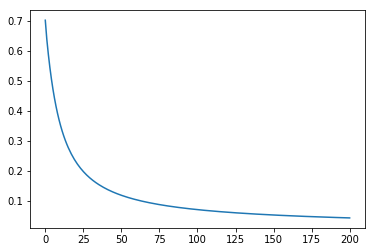

In [8]:
#X.shape (64, 289) y_train.shape (1, 289) W.shape (dim, 1) b.shape 1 Z.shape=A.shape (1, 289)
#定义sigmoid激活函数
def sigmoid(z):
    return 1 / (1+np.exp(-z))
#定义ReLU激活函数
def Relu(z):
    z = np.where(z>0, z, 0)
    return z
#初始化 dim为W参数的个数(属性的个数)
def initialize(dim):
    W = np.random.randn(dim, 1) / 100
    b = 0
    return W, b
#前向传播以及反向传播
def propagate(W, b, X, Y):
    m = X_train.shape[1]
    #forward propagation
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    #print(A)
    cost = - (1 / m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    #back propagation
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    #print(dw)
    #讲dw和db保存为字典输出
    grads = {'dw': dw,
             'db': db}
    return grads, cost

def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost=False):
#gradient descent and updata paremeters
#output : W, b所组成的字典, 保存每次迭代的cost
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(W, b, X_train, y_train)
        W = W - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']
        #print(grads['dw'])
        costs.append(cost)
        if (i % 100 == 0) and (print_cost == True):
            print('迭代次数：%i, cost: %f' % (i, cost))
        params = {'W': W,
                  'b': b}
    return params, costs
    
def predict(W, b, X):
    #输出预测
    m = X.shape[1]
    y = np.zeros((1, m))
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    for i in range(A.shape[1]):
        y[0, i] = 0 if A[0, i] < 0.5 else 1
    return np.array(y, dtype=np.int)


W, b = initialize(X_train.shape[0])
params, costs = optimize(W, b, X_train_scaler, y_train, 200, 0.01, False)
y_train_predict = predict(params['W'], params['b'], X_test)
print(accuracy_score(y_test.reshape(y_test.shape[1]), y_train_predict.reshape(y_test.shape[1])))
plt.figure()
plt.plot(np.linspace(0, 200, 200), costs)
print(y_train_predict)
y_test

In [6]:
X_train.shape

(64, 289)